# SVD
- Singlar Value Decomposition
- PCA는 정방행렬만을 고유벡터로 분해.
- SVD는 행과 열의 크기가 다른 행렬에도 적용

##### A(m x n) = (mxm)(mxn)(nxn)
$$A = U \Sigma V^T$$
- $\Sigma$는 대각행렬. 대각원소들이 A의 특이값(eigen value)

일반적으로 $\Sigma$의 비대각 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\Sigma$에 대응되는 U와V 원소도 함께 제거해 차원을 줄임

##### A(m x n) = (mxp)(pxp)(pxn)
![image](https://intoli.com/blog/pca-and-svd/img/svd-matrices.png)

# Truncated SVD
- $\Sigma$에 있는 대각원소, 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수 없다
- 당연히 원래 차원의 차수에 가깝게 truncate할 술고 원본 행렬에 더 가깝게 복원

# SVD example

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


## SVD 적용

In [4]:
#Sigma의 경우 0이 아닌 값만 반환하므로, 1차
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [8]:
print('U matrix : \n', np.round(U,3), '\n')
print('Sigma value : \n', np.round(Sigma,3), '\n')
print('V transpose matrix : \n', np.round(Vt,3))

U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

Sigma value : 
 [3.423 2.023 0.463 0.079] 

V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


## 분해된 값을 다시 원래대로

In [9]:
sigma_mat = np.diag(Sigma)
sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [11]:
a_ = np.dot(np.dot(U, sigma_mat), Vt)
np.round(a_,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

## row vector dependent한 경우,

In [12]:
a[2] = a[0] + a[1]
a[3] = a[0]

print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [14]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


Sigma 값 중 2개가 0. 선형 독립인 row vector는 2개. Rank 2

In [19]:
print('U matrix : \n', np.round(U,3), '\n')
print('Sigma value : \n', np.round(Sigma,3), '\n')
print('V transpose matrix : \n', np.round(Vt,3))

U matrix : 
 [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]] 

Sigma value : 
 [2.663 0.807 0.    0.   ] 

V transpose matrix : 
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


## 분해된 값을 다시 원래대로
Sigma에서 0에 대응되는 값을 제외하고 복원

In [23]:
Sigma_ = np.diag(Sigma[:2])
Sigma_

array([[2.66335286, 0.        ],
       [0.        , 0.80703506]])

In [16]:
U_ = U[:, :2]
U_

array([[ 0.24568427,  0.58278576],
       [-0.77441642, -0.01670951],
       [-0.52873215,  0.56607625],
       [ 0.24568427,  0.58278576]])

In [17]:
Vt_ = Vt[:2]
Vt_

array([[ 0.16449395, -0.57517122, -0.78233269, -0.17342252],
       [-0.67967123,  0.19439734, -0.13178782, -0.69490191]])

In [24]:
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
np.round(a_, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

# truncated SVD example - using scipy

In [25]:
from scipy.sparse.linalg import svds #truncated SVD
from scipy.linalg import svd #일반 SVD

In [26]:
#6x6
np.random.seed(121)
matrix = np.random.random((6,6))
matrix

array([[0.11133083, 0.21076757, 0.23296249, 0.15194456, 0.83017814,
        0.40791941],
       [0.5557906 , 0.74552394, 0.24849976, 0.9686594 , 0.95268418,
        0.48984885],
       [0.01829731, 0.85760612, 0.40493829, 0.62247394, 0.29537149,
        0.92958852],
       [0.4056155 , 0.56730065, 0.24575605, 0.22573721, 0.03827786,
        0.58098021],
       [0.82925331, 0.77326256, 0.94693849, 0.73632338, 0.67328275,
        0.74517176],
       [0.51161442, 0.46920965, 0.6439515 , 0.82081228, 0.14548493,
        0.01806415]])

## SVD 적용

In [27]:
U, Sigma, Vt = svd(matrix, full_matrices=False)
print(U.shape, Sigma.shape, Vt.shape)

print('\n Sigma matrix', Sigma)

(6, 6) (6,) (6, 6)

 Sigma matrix [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


## truncated SVD 적용
- 특이값 4

In [31]:
num_components = 4

U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('Truncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)

print('\n Trucnated SVD Sigma값 행렬 : ', Sigma_tr)

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

 Trucnated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]


## 분해된 값을 다시 원래대로

In [33]:
# SVD
Sigma_ = np.diag(Sigma)
np.dot(np.dot(U, Sigma_), Vt)

array([[0.11133083, 0.21076757, 0.23296249, 0.15194456, 0.83017814,
        0.40791941],
       [0.5557906 , 0.74552394, 0.24849976, 0.9686594 , 0.95268418,
        0.48984885],
       [0.01829731, 0.85760612, 0.40493829, 0.62247394, 0.29537149,
        0.92958852],
       [0.4056155 , 0.56730065, 0.24575605, 0.22573721, 0.03827786,
        0.58098021],
       [0.82925331, 0.77326256, 0.94693849, 0.73632338, 0.67328275,
        0.74517176],
       [0.51161442, 0.46920965, 0.6439515 , 0.82081228, 0.14548493,
        0.01806415]])

In [34]:
# truncated SVD
Sigma_tr_ = np.diag(Sigma_tr)
np.dot(np.dot(U_tr,Sigma_tr_ ), Vt_tr)

array([[0.19222941, 0.21792946, 0.15951023, 0.14084013, 0.81641405,
        0.42533093],
       [0.44874275, 0.72204422, 0.34594106, 0.99148577, 0.96866325,
        0.4754868 ],
       [0.12656662, 0.88860729, 0.30625735, 0.59517439, 0.28036734,
        0.93961948],
       [0.23989012, 0.51026588, 0.39697353, 0.27308905, 0.05971563,
        0.57156395],
       [0.83806144, 0.78847467, 0.93868685, 0.72673231, 0.6740867 ,
        0.73812389],
       [0.59726589, 0.47953891, 0.56613544, 0.80746028, 0.13135039,
        0.03479656]])

# truncated SVD example - using sklearn
- scipy처럼 $U, \Sigma, Vt$를 반환하지 않음

In [1]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

In [4]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TrucnatedSVD Component 2')

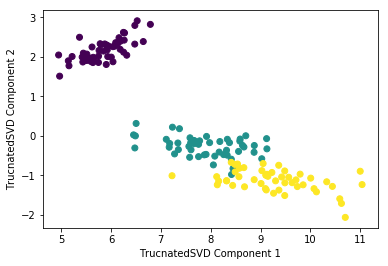

In [6]:
plt.scatter(iris_tsvd[:,0], iris_tsvd[:,1], c = iris.target)
plt.xlabel('TrucnatedSVD Component 1')
plt.ylabel('TrucnatedSVD Component 2')

# truncatedSVD, PCA - after scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

In [8]:
#truncatedSVD
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_scaled)

In [9]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

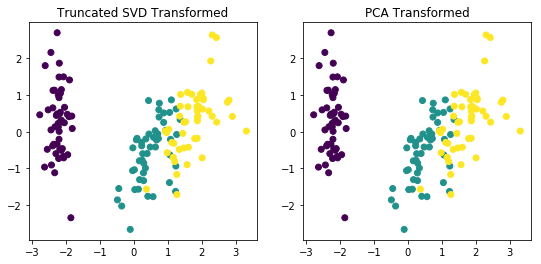

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols = 2)

ax1.scatter(iris_tsvd[:,0], iris_tsvd[:,1], c = iris.target)
ax2.scatter(iris_pca[:,0], iris_pca[:,1], c = iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [12]:
#0에 가까운 값이므로 거의 비슷한 결과라고 할 수 있음
print((iris_pca - iris_tsvd).mean())

print((pca.components_ - tsvd.components_).mean())

2.306835278353958e-15
-1.0668549377257364e-16
